In [2]:
import pandas as pd 
import numpy as np 

In [3]:
df = pd.read_csv("./source/TrafficTwoMonth.csv")
df

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal
...,...,...,...,...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,16,3,1,36,56,normal
5948,11:00:00 PM,9,Thursday,11,0,1,30,42,normal
5949,11:15:00 PM,9,Thursday,15,4,1,25,45,normal
5950,11:30:00 PM,9,Thursday,16,5,0,27,48,normal


In [4]:
from datetime import datetime, timedelta

def generate_datetime(input_time, input_date, input_day_of_week, year=2023, month=12):
    # Mapping of weekday to integer
    weekday_to_int = {
        'Monday': 0,
        'Tuesday': 1,
        'Wednesday': 2,
        'Thursday': 3,
        'Friday': 4,
        'Saturday': 5,
        'Sunday': 6
    }

    # Convert time string to datetime object
    time_object = datetime.strptime(input_time, '%I:%M:%S %p')

    # Create a datetime object with the input date and time
    dt = datetime(year=year, month=month, day=input_date, hour=time_object.hour, minute=time_object.minute, second=time_object.second)

    # Calculate the difference between the desired and current weekday
    weekday_diff = weekday_to_int[input_day_of_week] - dt.weekday()
    if weekday_diff < 0:
        # If the desired weekday is before the current date, move to the next week
        weekday_diff += 7

    # Create the final datetime object
    final_dt = dt + timedelta(days=weekday_diff)

    return final_dt

In [5]:
import copy 
new_df = copy.copy(df)

In [6]:
new_df = new_df.drop(["CarCount", "BikeCount", "BusCount", "TruckCount", "Total"], axis=1)
new_df

,Time,Date,Day of the week,Traffic Situation
0,12:00:00 AM,10,Tuesday,normal
1,12:15:00 AM,10,Tuesday,normal
2,12:30:00 AM,10,Tuesday,normal
3,12:45:00 AM,10,Tuesday,normal
4,1:00:00 AM,10,Tuesday,normal
...,...,...,...,...
5947,10:45:00 PM,9,Thursday,normal
5948,11:00:00 PM,9,Thursday,normal
5949,11:15:00 PM,9,Thursday,normal
5950,11:30:00 PM,9,Thursday,normal


In [7]:
new_df2 = copy.copy(new_df)
new_df2['Datetime'] = new_df2.apply(lambda x: generate_datetime(x['Time'], x['Date'], x['Day of the week']), axis=1) 
new_df2

,Time,Date,Day of the week,Traffic Situation,Datetime
0,12:00:00 AM,10,Tuesday,normal,2023-12-12 00:00:00
1,12:15:00 AM,10,Tuesday,normal,2023-12-12 00:15:00
2,12:30:00 AM,10,Tuesday,normal,2023-12-12 00:30:00
3,12:45:00 AM,10,Tuesday,normal,2023-12-12 00:45:00
4,1:00:00 AM,10,Tuesday,normal,2023-12-12 01:00:00
...,...,...,...,...,...
5947,10:45:00 PM,9,Thursday,normal,2023-12-14 22:45:00
5948,11:00:00 PM,9,Thursday,normal,2023-12-14 23:00:00
5949,11:15:00 PM,9,Thursday,normal,2023-12-14 23:15:00
5950,11:30:00 PM,9,Thursday,normal,2023-12-14 23:30:00


In [9]:
new_df3 = new_df2.set_index('Datetime')
new_df4 = new_df3.drop(['Time', 'Date', 'Day of the week'], axis=1)

In [10]:
traffic_sistuation = {
    'low': 0,
    'normal': 1,
    'high': 2, 
    'heavy':3
}

In [11]:
new_df4['Traffic Situation'] = new_df4['Traffic Situation'].replace(traffic_sistuation)
new_df4

,Traffic Situation
Datetime,
2023-12-12 00:00:00,1
2023-12-12 00:15:00,1
2023-12-12 00:30:00,1
2023-12-12 00:45:00,1
2023-12-12 01:00:00,1
...,...
2023-12-14 22:45:00,1
2023-12-14 23:00:00,1
2023-12-14 23:15:00,1


In [12]:
data = pd.get_dummies(new_df4.to_numpy().reshape(-1), dtype=int).values
data

array([[0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [13]:
timestep = 30

X = []
y = []

n = len(data)

for i in range(n - (timestep)):
    X.append(data[i:i+timestep])
    y.append(data[i+timestep])

X = np.asanyarray(X)
y = np.asanyarray(y)


index_test = 5000
X_train = X[:index_test,:,:]
X_test = X[index_test:,:,:]
y_train = y[:index_test]    
y_test= y[index_test:]  

In [14]:
X_train.shape

(5000, 30, 4)

In [15]:
y_train.shape

(5000, 4)

In [16]:
import tensorflow as tf 
import keras
from keras import layers

In [17]:
model = keras.models.Sequential([
    layers.LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    layers.Dense(4, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                11000     
                                                                 
 dense (Dense)               (None, 4)                 204       
                                                                 
Total params: 11204 (43.77 KB)
Trainable params: 11204 (43.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
X_train

array([[[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]],

       [[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]],

       [[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]],

       ...,

       [[0, 1, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 0, 0, 1]],

       [[1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 0, 0, 1],
        [0, 1, 0, 0]],

       [[0, 1, 0, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]])

In [21]:
history = model.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
157/157 [==============================] - 3s 9ms/step - loss: 1.0002 - accuracy: 0.6184
Epoch 2/20
157/157 [==============================] - 1s 8ms/step - loss: 0.8337 - accuracy: 0.7024
Epoch 3/20
157/157 [==============================] - 1s 8ms/step - loss: 0.8081 - accuracy: 0.7096
Epoch 4/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7860 - accuracy: 0.7126
Epoch 5/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7954 - accuracy: 0.7098
Epoch 6/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7774 - accuracy: 0.7116
Epoch 7/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7663 - accuracy: 0.7180
Epoch 8/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7693 - accuracy: 0.7172
Epoch 9/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7611 - accuracy: 0.7150
Epoch 10/20
157/157 [==============================] - 1s 8ms/step - loss: 0.7559 - accuracy: 0.7150

In [22]:
history.history['loss']

[1.000231385231018,
 0.8337042927742004,
 0.808107316493988,
 0.786042332649231,
 0.795438826084137,
 0.7774359583854675,
 0.7663231492042542,
 0.769325315952301,
 0.7611028552055359,
 0.7559294700622559,
 0.7480742335319519,
 0.7448972463607788,
 0.7400150895118713,
 0.7358856201171875,
 0.7284843325614929,
 0.7256259918212891,
 0.7172595858573914,
 0.7175044417381287,
 0.7165201306343079,
 0.7056905627250671]

In [25]:
y_pred = model.predict(X_test)

29/29 [==============================] - 0s 4ms/step


In [28]:
y_pred = y_pred.argmax(axis=1)

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [34]:
y_test = y_test.argmax(axis=1)

In [35]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 2, 1, 0, 2, 2, 1, 1, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 3, 3, 3, 3, 1, 3, 3, 3, 2, 3, 3, 2, 3, 2, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [24]:
import matplotlib.pyplot as plt

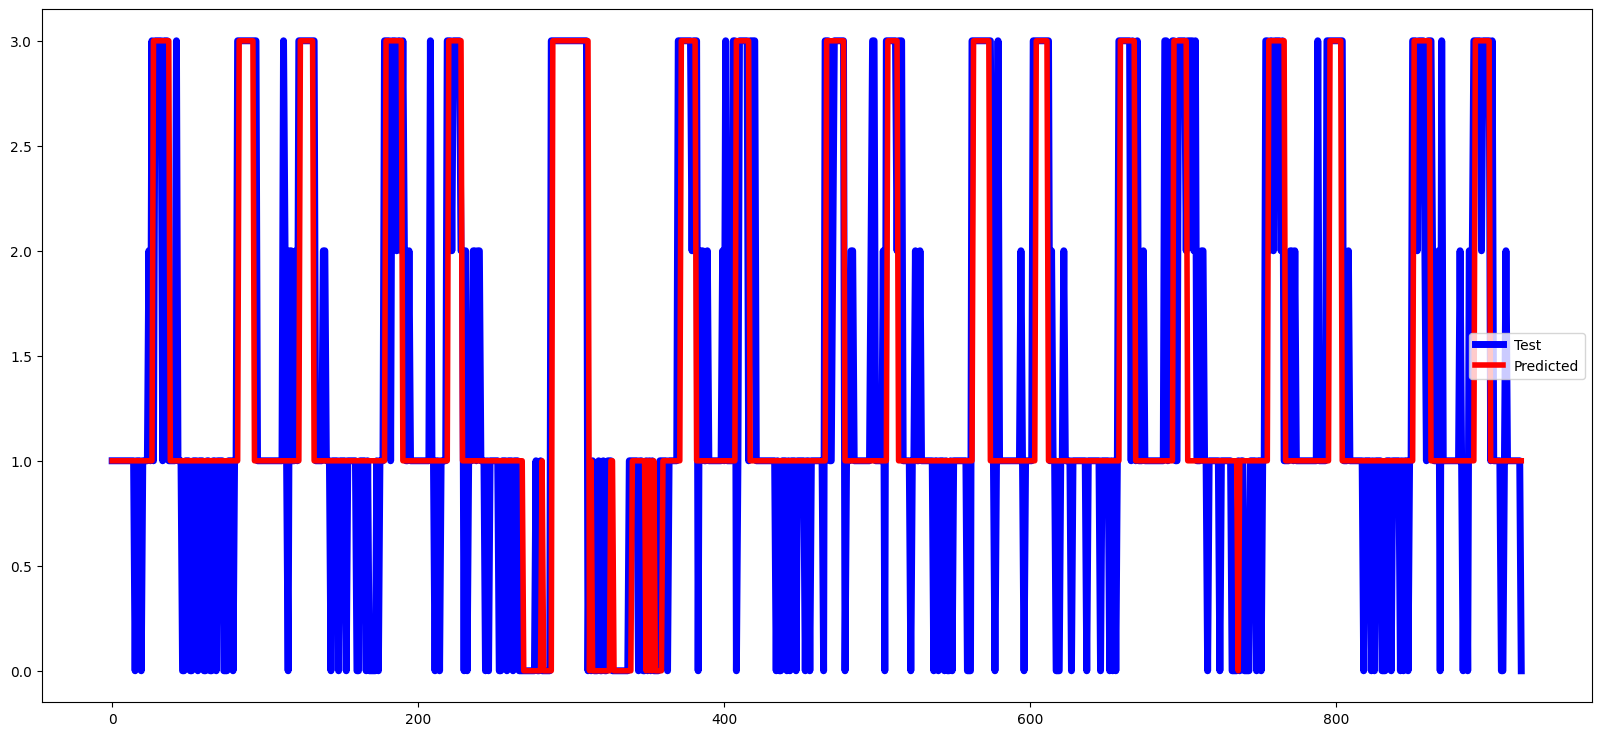

In [37]:
plt.figure(figsize=(20,9))
plt.plot(y_test, 'blue', linewidth=5)
plt.plot(y_pred,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()